# Import necessary things

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_2015 = pd.read_csv('2015.csv')

In [3]:
data_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

## !! No need to clean data !!

# Task 1: Correlation between variables

In [10]:
data_2015[['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)']].corr()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy)
Happiness Score,1.000000,0.780966,0.740605,0.724200
Economy (GDP per Capita),0.780966,1.000000,0.645299,0.816478
Family,0.740605,0.645299,1.000000,0.531104
Health (Life Expectancy),0.724200,0.816478,0.531104,1.000000


# Task 2: Calculate Mean Happiness Score by Region

In [12]:
regions = data_2015.groupby('Region')
mean_happiness_regions = regions['Happiness Score'].mean()
mean_happiness_regions

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

## Task 2.1: Plotting

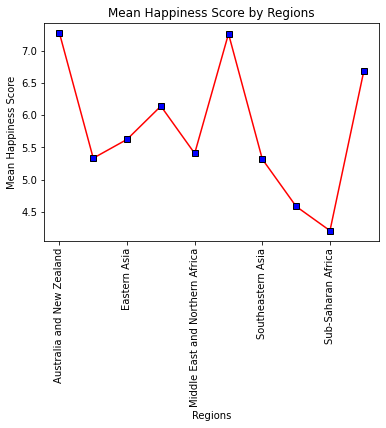

In [75]:
mean_happiness_regions.plot(kind = 'line', color = 'r', marker = 's', mfc = 'b', mec = 'k', x_compat = True, subplots = True)

plt.xlabel('Regions')
plt.ylabel('Mean Happiness Score')
plt.title('Mean Happiness Score by Regions')

plt.xticks(rotation = 90 , verticalalignment = 'top')

plt.show()

## Ploting 2

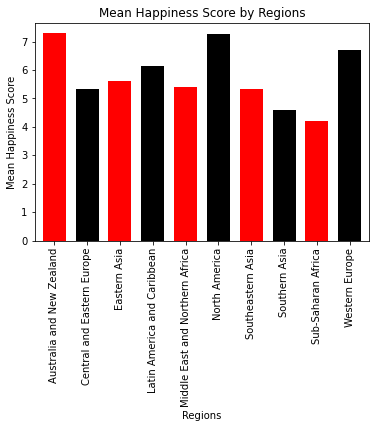

In [86]:
mean_happiness_regions.plot(kind = 'bar', color = ['r','k'], width = 0.7)

plt.xlabel('Regions')
plt.ylabel('Mean Happiness Score')
plt.title('Mean Happiness Score by Regions')

plt.xticks(rotation = 90 , verticalalignment = 'top')

plt.show()

## Task 2.2: Using Pivot Table

In [15]:
pd.pivot_table(data_2015, values = 'Happiness Score', index = 'Region', aggfunc = np.mean)

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


### pivot table
pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True)

# Task 3: Filter all Asian country

DataFrame.filter(items=None, like=None, regex=None, axis=None)


In [44]:
asian = []
for i in data_2015['Region'].unique():
    if 'Asia' in i:
        asian.append(i)
print(asian) # create a list of condition

['Southeastern Asia', 'Eastern Asia', 'Southern Asia']


In [52]:
asian_data = data_2015[data_2015.Region.isin(asian)]

asian_data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
23,Singapore,Southeastern Asia,24,6.798,0.03780,1.52186,1.02000,1.02525,0.54252,0.49210,0.31105,1.88501
33,Thailand,Southeastern Asia,34,6.455,0.03557,0.96690,1.26504,0.73850,0.55664,0.03187,0.57630,2.31945
37,Taiwan,Eastern Asia,38,6.298,0.03868,1.29098,1.07617,0.87530,0.39740,0.08129,0.25376,2.32323
45,Japan,Eastern Asia,46,5.987,0.03581,1.27074,1.25712,0.99111,0.49615,0.18060,0.10705,1.68435
46,South Korea,Eastern Asia,47,5.984,0.04098,1.24461,0.95774,0.96538,0.33208,0.07857,0.18557,2.21978


## Notes:
asian_data = data_2015[data_2015.Region.isin(asian)] -> get values in Asia

asian_data = data_2015[~data_2015.Region.isin(asian)] -> get values NOT in Asia

asian_data = data_2015[data_2015.Region == 'Eastern Asia'] -> get 'Eastern Asia'